# **Lesson 6. 카시트 판매량 분석 및 예측**

* 실습 배경
    * 카시트 전문 기업의 영업팀장 A씨는 최근 계속해서 하락하는 매출 감소로 고민 중입니다.
    * 경쟁사들의 가격 경쟁력으로 인해 마케팅과 광고 비용을 줄이는 등의 노력으로도 매출 회복이 쉽지 않은 상황입니다.
    * 더불어 자국내 시장에서의 매출 증대에 한계를 느끼고 있는데,
    * 그 이유 중 하나는 지역별 영업이익의 차이와 지역별 소비력 파악의 어려움 때문입니다.
    * 이에 영업팀장 A씨는 매출 감소의 주요 원인을 찾고, 매출 회복을 위한 전략을 수립하고자 합니다.

* 데이터 분석 목표
    * ① 문제 정의 및 요인 파악을 위한 가설 확인
    * ② 중요 변수 발견
        * 어떤 변수가 카시트 판매 매출에 영향을 미치는지 변수를 확인
    * ③ 매출과 매출에 영향을 주는 변수 간의 관계 분석
        * 매출에 영향을 주는 변수(독립 변수)가 카시트 판매 매출에 어떠한 영향을 미치는지 분석


## **1.환경준비**

### **(1) 라이브러리 로딩**

In [1]:
# jupyter lite에서 패키지 설치
import piplite
await piplite.install("seaborn")

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|  데이터 유형 |
|----|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	target	| 수치형 |
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	| 수치형 |
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	| 수치형 |
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good) 	|	feature	| 범주형 |
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	| 범주형 |
|	Income 	|	 지역 주민 평균 소득(천 달러)	|	feature	| 수치형 |
|	Urban 	|	 매장이 도시에 있는지 여부(범주 : Yes, No)	|	feature	| 범주형 |



In [2]:
path = 'carseat.csv'
data = pd.read_csv(path)

## **2.기본 탐색**

### **(1) 상위, 하위 5개의 정보 확인**
* .head()
* .tail()

In [3]:
data.head()

,Sales,CompPrice,Income,Price,ShelveLoc,Urban,US
0,9.50,138,73,120,Bad,Yes,Yes
1,11.22,111,48,83,Good,Yes,Yes
2,10.06,113,35,80,Medium,Yes,Yes
3,7.40,117,100,97,Medium,Yes,Yes
4,4.15,141,64,128,Bad,Yes,No


In [4]:
data.tail()

,Sales,CompPrice,Income,Price,ShelveLoc,Urban,US
395,12.57,138,108,128,Good,Yes,Yes
396,6.14,139,23,120,Medium,No,Yes
397,7.41,162,26,159,Medium,Yes,Yes
398,5.94,100,79,95,Bad,Yes,Yes
399,9.71,134,37,120,Good,Yes,Yes


### **(2) 데이터프레임 정보 확인**
* .info()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 400 entries, 0 to 399

Data columns (total 7 columns):

 #   Column     Non-Null Count  Dtype  

---  ------     --------------  -----  

 0   Sales      400 non-null    float64

 1   CompPrice  400 non-null    int64  

 2   Income     400 non-null    int64  

 3   Price      400 non-null    int64  

 4   ShelveLoc  400 non-null    object 

 5   Urban      400 non-null    object 

 6   US         400 non-null    object 

dtypes: float64(1), int64(3), object(3)

memory usage: 22.0+ KB


## **3.단변량 분석**

### **(1) 수치형 변수**

* 기초통계량 : .describe()
* 그래프 : 히스토그램, 박스플롯 등

#### **1)  Sales**

* 기초통계량

In [6]:
var = 'Sales'
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

* 그래프

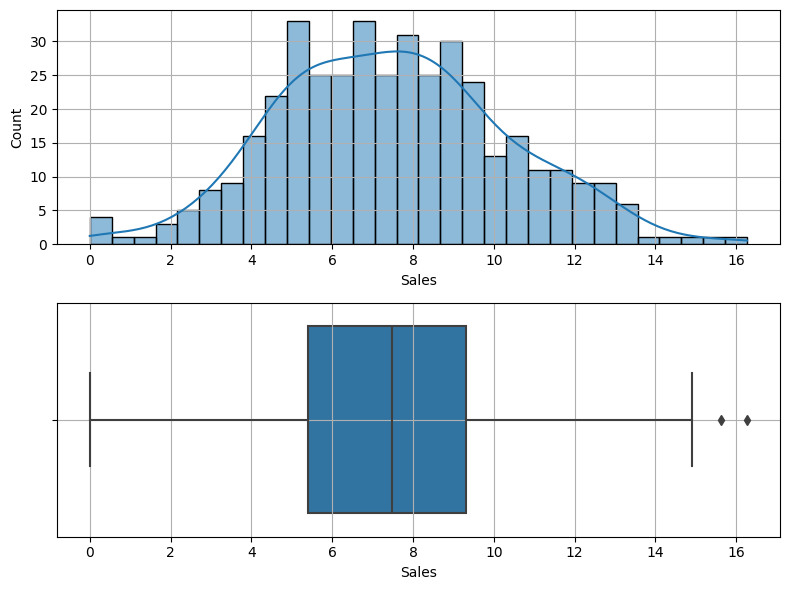

In [7]:
plt.figure(figsize = (8,6))
plt.subplot(2,1,1)
sns.histplot(x = var, data = data, bins = 30, kde = True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = var, data = data)
plt.grid()

plt.tight_layout()
plt.show()

* 파악한 내용을 적어 봅시다.

In [8]:
# 밀집구간 : 5.4 ~ 9.3 , 판매량이 5400 ~ 9300
# 희박구간 : ~2, 판매량이 2000개 보다 적은 지역
# 14~ , 판매량이 14000보다 많은 지역

#### **2)  CompPrice**

* 기초통계량

In [9]:
var = 'CompPrice'
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

* 그래프

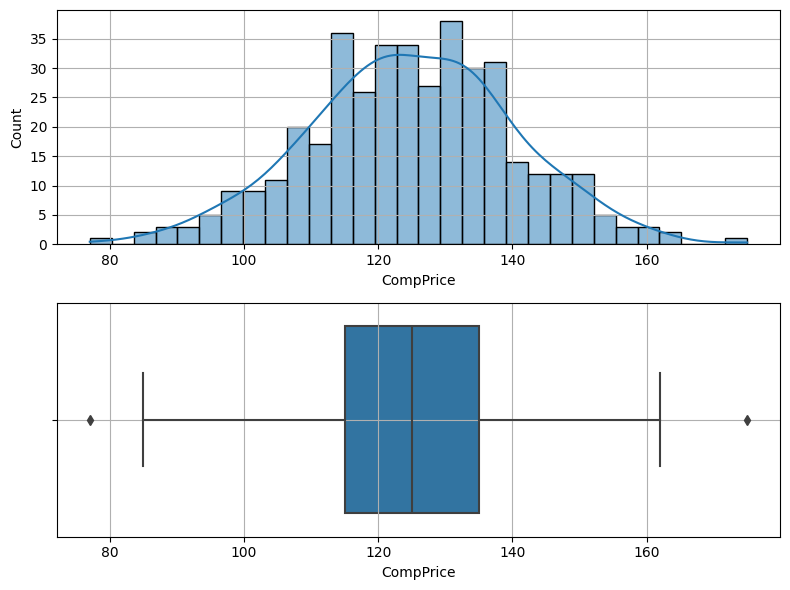

In [10]:
plt.figure(figsize = (8,6))
plt.subplot(2,1,1)
sns.histplot(x = var, data = data, bins = 30, kde = True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = var, data = data)
plt.grid()

plt.tight_layout()
plt.show()

* 파악한 내용을 적어 봅시다.

In [11]:
# 밀집구간 : 115 ~ 135
# 희박구간 : ~ 100, 160~

#### **3) Income**

* 기초통계량

In [12]:
var = 'Income'
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

* 그래프

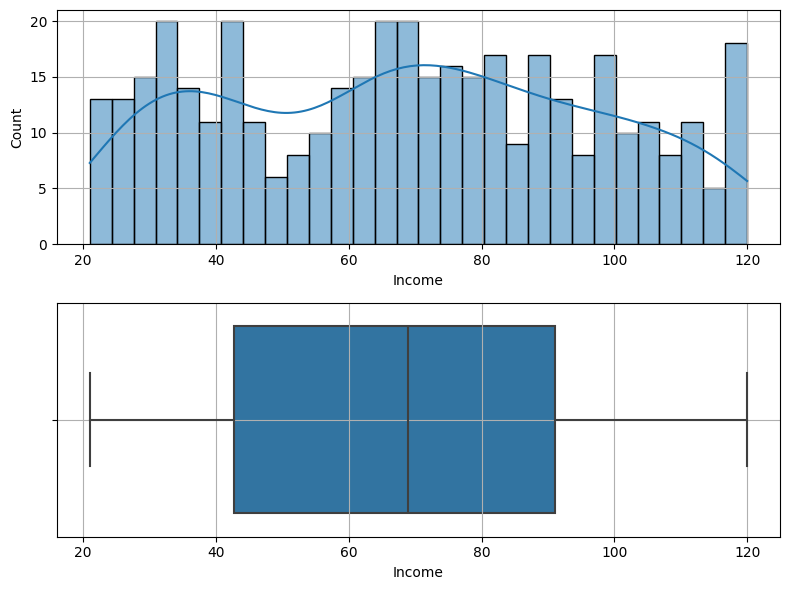

In [13]:
plt.figure(figsize = (8,6))
plt.subplot(2,1,1)
sns.histplot(x = var, data = data, bins = 30, kde = True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = var, data = data)
plt.grid()

plt.tight_layout()
plt.show()

* 파악한 내용을 적어 봅시다.

In [14]:
# 소득수준 : 21000 ~ 120000

#### **4) Price**

* 기초통계량

In [15]:
var = 'Price'
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

* 그래프

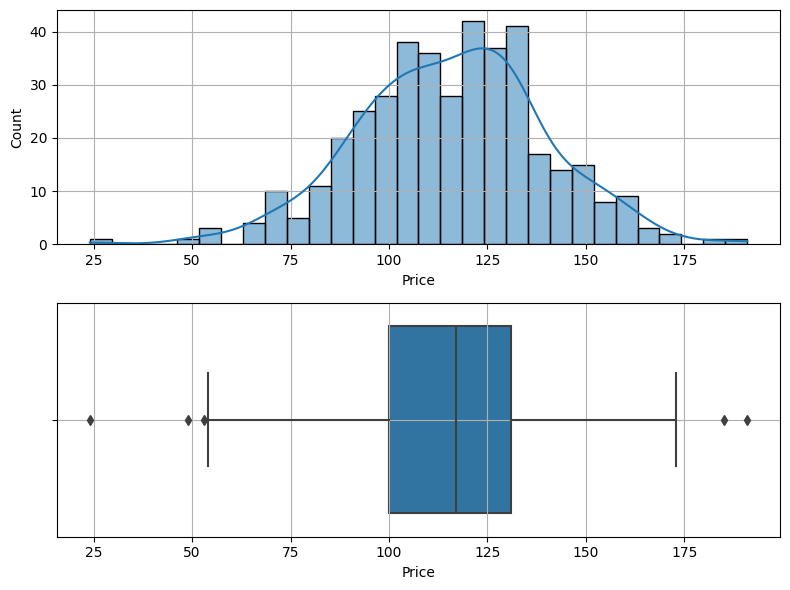

In [16]:
plt.figure(figsize = (8,6))
plt.subplot(2,1,1)
sns.histplot(x = var, data = data, bins = 30, kde = True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = var, data = data)
plt.grid()

plt.tight_layout()
plt.show()

* 파악한 내용을 적어 봅시다.

In [17]:
# 밀집구간 : 100 ~ 131
# 희박구간 : ~ 75, 150 ~

### **(2) 범주형 변수**
* 기초통계량 : 범주별 빈도수/비율
* 그래프 : 막대 그래프(sns.countplot)

#### **1)  ShelveLoc**

* 기초통계량

In [18]:
var = 'ShelveLoc'
print(data[var].value_counts())
print(data[var].value_counts(normalize = True))

Medium    219

Bad        96

Good       85

Name: ShelveLoc, dtype: int64

Medium    0.5475

Bad       0.2400

Good      0.2125

Name: ShelveLoc, dtype: float64


* 그래프

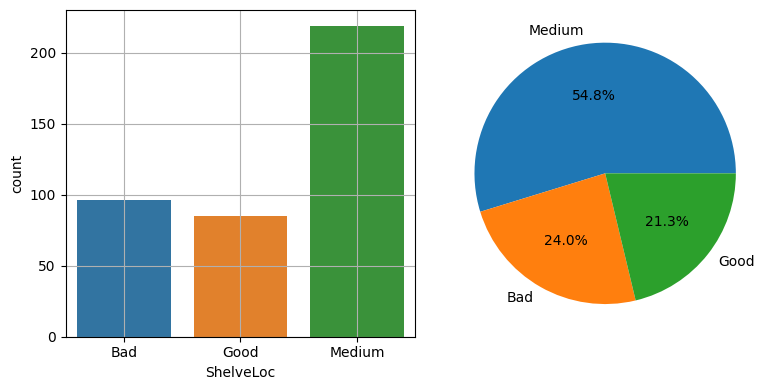

In [19]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.countplot(x = var, data = data)
plt.grid()

plt.subplot(1,2,2)
temp = data[var].value_counts()
plt.pie(temp.values, labels = temp.index, autopct = '%.1f%%')
plt.grid()

plt.tight_layout()
plt.show()

* 파악한 내용을 적어 봅시다.

In [21]:
# ShelveLoc : Good : 21.3%, Medium - 54.8%, Bad - 24%

#### **2) Urban**

* 기초통계량

In [22]:
var = 'Urban'
print(data[var].value_counts())
print(data[var].value_counts(normalize = True))

Yes    282

No     118

Name: Urban, dtype: int64

Yes    0.705

No     0.295

Name: Urban, dtype: float64


* 그래프

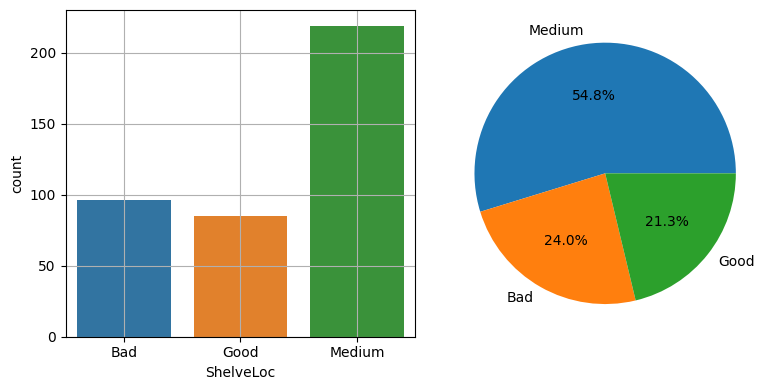

In [20]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.countplot(x = var, data = data)
plt.grid()

plt.subplot(1,2,2)
temp = data[var].value_counts()
plt.pie(temp.values, labels = temp.index, autopct = '%.1f%%')
plt.grid()

plt.tight_layout()
plt.show()

* 파악한 내용을 적어 봅시다.

In [21]:
# 도심 - 70%, 외곽 - 30%

#### **3) US**

* 기초통계량

In [22]:
var = 'US'
print(data[var].value_counts())
print(data[var].value_counts(normalize = True))

Yes    258

No     142

Name: US, dtype: int64

Yes    0.645

No     0.355

Name: US, dtype: float64


* 그래프

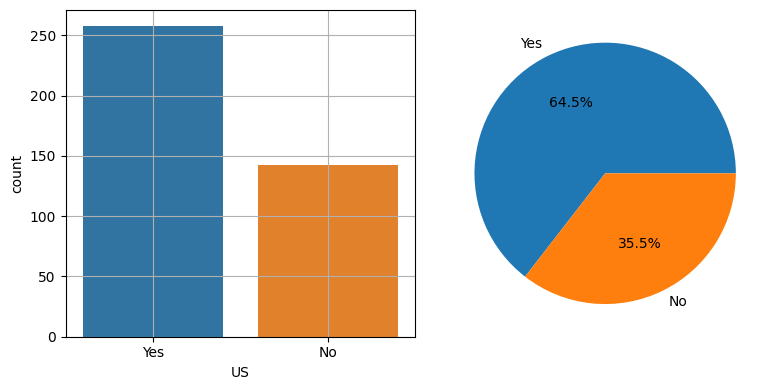

In [23]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.countplot(x = var, data = data)
plt.grid()

plt.subplot(1,2,2)
temp = data[var].value_counts()
plt.pie(temp.values, labels = temp.index, autopct = '%.1f%%')
plt.grid()

plt.tight_layout()
plt.show()

* 파악한 내용을 적어 봅시다.

In [24]:
# 국내 - 64.5%
# 국외 - 35.5%

## **4.이변량분석**

* 그래프 : scatter


In [25]:
target = 'Sales'

### **(1) 숫자형 X --> Y**

#### **1) CompPrice -> Sales**

* 그래프

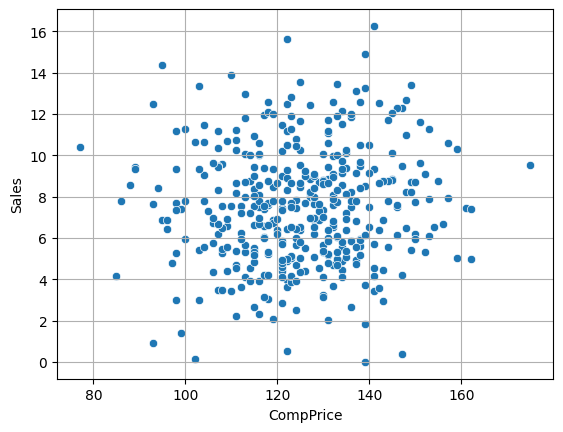

In [26]:
var = 'CompPrice'
sns.scatterplot(x=var, y = target, data = data)
plt.grid()
plt.show()

 * 파악한 내용을 적어 봅시다.

In [27]:
# ComPrice와 Sales는 관련이 없다.

#### **2) Income -> Sales**

* 그래프

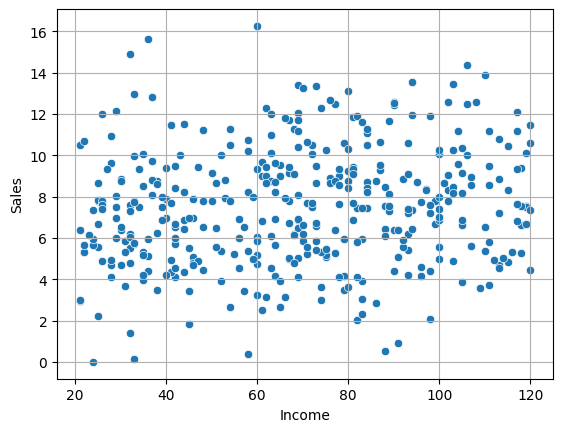

In [28]:
var = 'Income'
sns.scatterplot(x=var, y = target, data = data)
plt.grid()
plt.show()

 * 파악한 내용을 적어 봅시다.

In [29]:
# Income과 Sales 약한 관계가 있다.

#### **3) Price -> Sales**

* 그래프

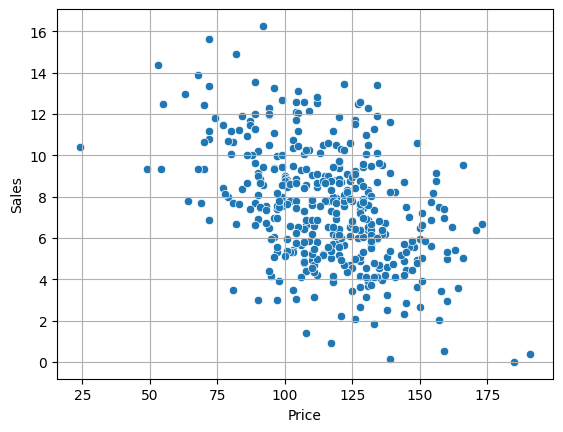

In [30]:
var = 'Price'
sns.scatterplot(x=var, y = target, data = data)
plt.grid()
plt.show()

 * 파악한 내용을 적어 봅시다.

In [31]:
# Price가 오를 수록, Sales는 줄어든다.

### **(2) 범주형 X --> Y**

* 그래프 : 평균비교 막대그래프

#### **1) ShelveLoc-> Sales**

* 그래프

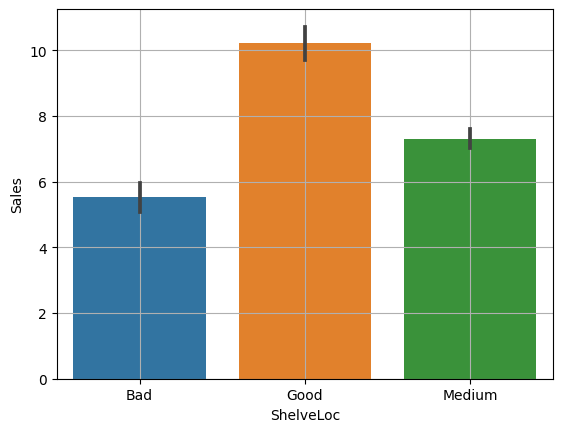

In [32]:
var = 'ShelveLoc'
sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

 * 파악한 내용을 적어 봅시다.

In [33]:
# ShelveLoc에 따라 판매량에 차이가 크다.

#### **2) Urban -> Sales**

* 그래프

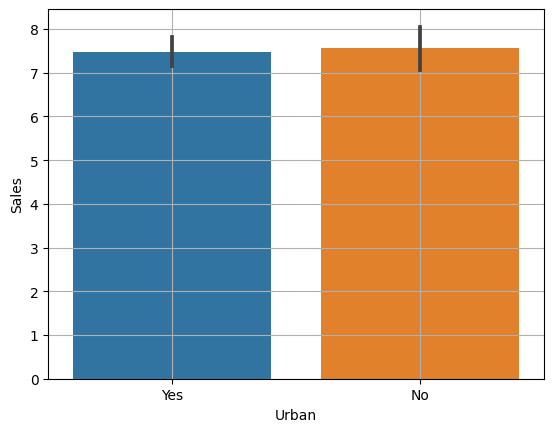

In [34]:
var = 'Urban'
sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

 * 파악한 내용을 적어 봅시다.

In [35]:
# Urban에 따라 판매량은 차이가 없다.

#### **3) US-> Sales**

* 그래프

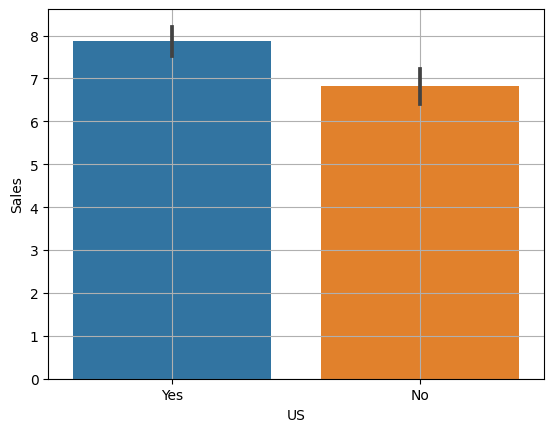

In [36]:
var = 'US'
sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

 * 파악한 내용을 적어 봅시다.

In [37]:
# US에 따라 판매량에 차이가 있다.

### **(3) 관계 정리하기**

* 강한관계

In [38]:
# Shelveloc, Price, US

* 중간관계

In [39]:
# Income

* 관계없음

In [40]:
# ComPrice, Urban

## **5.예측 모델링**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

### **(1) 데이터 준비**
* 모델링을 위해서는 데이터가 특별한 형태로 준비되어야 합니다.
    * 본 실습에서는 준비에 대한 세세한 내용을 다루지는 않습니다.
    * 가변수화 : 범주형 --> 수치형 변환
    * 데이터 분할 : 학습용과 검증용 분할
        * 학습용 : 모델링 용도
        * 검증용 : 모델 성능 측정(검증)

In [42]:
target = 'Sales'

In [43]:
# 데이터 분할1 : x, y 분할
x = data.drop(target, axis = 1)
y = data[target]

In [44]:
# 가변수화
def dummy_var(x):
    x['ShelveLoc'] = pd.Categorical(x['ShelveLoc'], categories=['Good','Medium','Bad'])
    x['Urban'] = pd.Categorical(x['Urban'], categories=['Yes','No'])
    x['US'] = pd.Categorical(x['US'], categories=['Yes','No'])

    category_cols = ['ShelveLoc', 'Urban', 'US']
    x = pd.get_dummies(x, columns = category_cols, drop_first = True)
    return x

x = dummy_var(x)

In [45]:
# 데이터 분할2 : 학습용 : 검증용
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

### **(2) 모델링 및 평가**

* 모델링 절차
    * 선언
    * 학습(모델링) : x_train, y_train
    * 예측 : x_test
    * 평가 : y_test, 예측값

In [46]:
# 선언 model = LinearRegression()
model = LinearRegression()

In [47]:
# 학습 model.fit(x_train, y_train)
model.fit(x_train, y_train)

LinearRegression()

In [48]:
# 예측 pred = model.predict(x_test)
pred = model.predict(x_test)

In [49]:
# 평가 : 평균오차 mean_absolute_error(y_test, pred)
mean_absolute_error(y_test, pred)

1.3343902400604963

### **(3) 모델 사용**

* 아래와 같은 새로운 정보에 대해서 판매량을 예측해 봅시다.


|CompPrice|Income|Price|ShelveLoc|US|Urban|
|----|----|----|----|----|----|
|120(달러)|30(천 달러)|100(달러)|Good|Yes|No|

In [50]:
# 새로운 데이터 준비
new_data = pd.DataFrame({'CompPrice':[120], 'Income':[30], 'Price':[100],
                        'ShelveLoc':['Good'], 'Urban':['Yes'], 'US':['No']})

# 전처리
new_data = dummy_var(new_data)

# 판매량 예측
model.predict(new_data)[0]

9.92099209392911